In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Resources/Autism.csv")
# # Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [10]:
ethnicities = df['Ethnicity'].value_counts()
total_participants = len(df["Case No"].unique())
total_participants

1117

In [14]:
new_df = df.loc[:, ["Ethnicity", "Family_ASD"]]
ethnic_totals = ethnicities
ethnic_percent = ethnic_totals / total_participants
familial_counts = df["Family_ASD"].value_counts()

In [16]:
other_df = pd.DataFrame({"Total Count": ethnic_totals, "Ethnic Percent": ethnic_percent})
other_df

,Total Count,Ethnic Percent
white,524,0.469114
middle eastern,210,0.188004
asian,162,0.145031
black,58,0.051925
others,44,0.039391
south asians,39,0.034915
latino,36,0.032229
hispanic,23,0.020591
aboriginal,21,0.018800


In [19]:
ethnic_groupby = df.groupby(["Ethnicity"])
ethnic_groupby.count()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
Ethnicity,,,,,,,,,,,,,,,,,,,,,,
aboriginal,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
asian,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
black,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
hispanic,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
latino,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
middle eastern,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
others,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
south asians,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
white,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524,524


In [26]:
mean_score = df.groupby(["Ethnicity", "Family_ASD"]).mean()["Score"]
razor_df = pd.DataFrame({"Score": mean_score})
razor_df

Score
Ethnicity      Family_ASD          
aboriginal     no          4.894737
               yes         7.000000
asian          no          4.388158
               yes         5.200000
black          no          5.905660
               yes         6.600000
hispanic       no          5.500000
               yes         3.666667
latino         no          6.363636
               yes         6.642857
middle eastern no          3.836842
               yes         5.300000
others         no          5.205128
               yes         6.200000
south asians   no          3.756757
               yes         3.500000
white          no          5.667494
               yes         6.380165

In [33]:
mean2_score = df.groupby(["Family_ASD"]).mean()["Score"]
mean_df = pd.DataFrame({"Score": mean2_score})
mean_df

,Score
Family_ASD,
no,5.003209
yes,6.148352


In [57]:
something = df.groupby(["Ethnicity", "Class", "Family_ASD"]).mean()["Score"]
#something_age = df.groupby(["Ethnicity", "Class", "Family_ASD"]).mean()["Age"]
something_df = pd.DataFrame({"Score": something})
                             
something_df

Score
Ethnicity      Class Family_ASD           
aboriginal     NO    no           3.733333
                     yes          4.000000
               YES   no           9.250000
                     yes         10.000000
asian          NO    no           3.746154
                     yes          4.000000
               YES   no           8.181818
                     yes          8.000000
black          NO    no           3.500000
                     yes          5.500000
               YES   no           8.600000
                     yes          7.333333
hispanic       NO    no           4.166667
                     yes          1.000000
               YES   no           7.500000
                     yes          9.000000
latino         NO    no           4.909091
                     yes          5.000000
               YES   no           7.818182
                     yes          7.875000
middle eastern NO    no           3.424419
                     yes          4.000000
               YES   no           7.777778
                     yes          8.333333
others         NO    no           3.769231
                     yes          4.333333
               YES   no           8.076923
                     yes          9.000000
south asians   NO    no           3.441176
                     yes          3.500000
               YES   no           7.333333
white          NO    no           3.793249
                     yes          4.192982
               YES   no           8.343373
                     yes          8.328125

In [60]:
df

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2486,0,1,1,0,0,0,0,0,0,0,51,f,white,no,yes,New Zealand,no,2,17 and more,english,self,NO
1114,2487,1,1,1,1,1,1,1,1,1,1,43,m,white,no,no,United Kingdom,no,10,17 and more,english,self,YES
1115,2489,1,0,0,0,0,0,1,1,1,1,43,m,white,yes,yes,United Kingdom,no,5,17 and more,english,self,NO
1116,2492,1,1,0,1,1,1,0,1,0,1,21,f,white,no,no,United States,no,7,17 and more,english,self,YES


ValueError: Colormap Set3d is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

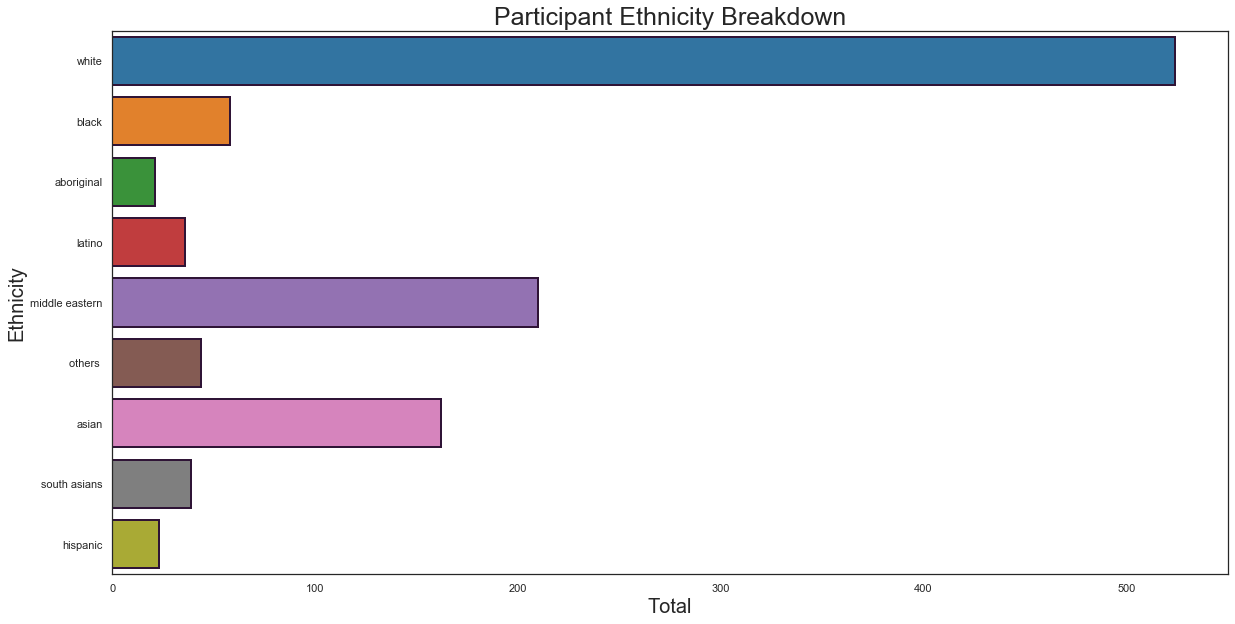

In [167]:
plt.figure(figsize=(20,10))
sns.set(style="white")

ax = sns.countplot(y="Ethnicity", data=df,
                   palette="tab10", alpha=1,
                   linewidth=2,
                   edgecolor=sns.color_palette("twilight", 1))


ax.set_title("Participant Ethnicity Breakdown", fontsize=25)
ax.set_ylabel("Ethnicity", fontsize=20)
ax.set_xlabel("Total", fontsize=20)

# plt.figure(figsize=(15,6))
# x = df['Age']
# sns.set_style("darkgrid")
# ax = sns.distplot(x, 
#                   kde_kws={"color": "white", "lw": 3, 
#                            "label": "Kernel Density Estimate"},
#                   hist_kws={"alpha": .9, "color": "navy"})
# ax.set_title('Age Distribution of Participants', fontsize=20)
# ax.set_xlim(age_min - 10, age_max + 3)
# ax.set_xlabel('Age',fontsize=15)

import os
plt.savefig(os.path.join("Images", "EthnicityBreakdown.png"))